# Understanding Cost & Gradient Descent functions for Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [61]:
get_theta = lambda theta: np.array([[0, theta]])

list(map(get_theta, [0.5, 1.0, 1.5]))

[array([[0. , 0.5]]), array([[0., 1.]]), array([[0. , 1.5]])]

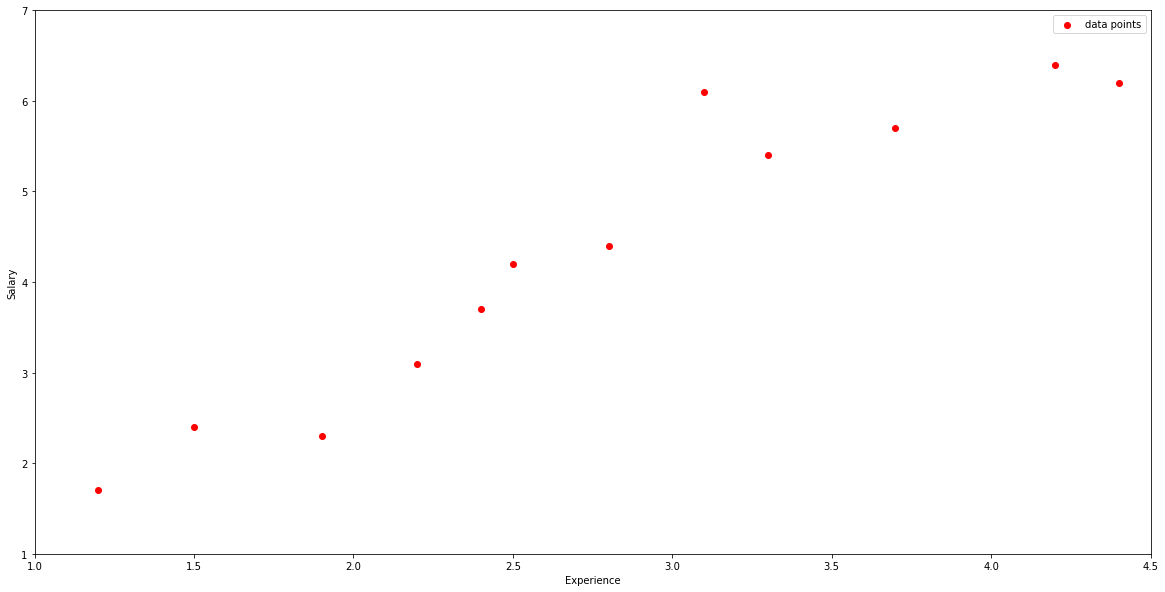

In [95]:
# Creating Simple Data
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({"experience": experience, "salary": salary})

# plotting the data
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

##### Calculate Hyper Parameters

In [96]:
beta_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5]
y_intercept = 1.1

def hypothesis_gen(X, beta, y_inter):
    out = []
    for i in range(len(X)):
        out.append(X[i]*beta+y_inter)
    return out

In [97]:
for i in beta_values:
    data['beta_'+str(i)] = hypothesis_gen(data['experience'], i, y_intercept)

data.head()

,experience,salary,beta_0.1,beta_0.2,beta_0.3,beta_0.4,beta_0.5,beta_0.6,beta_0.7,beta_0.8,beta_0.9,beta_1.0,beta_1.5,beta_2.0,beta_2.5
0,1.2,1.7,1.22,1.34,1.46,1.58,1.70,1.82,1.94,2.06,2.18,2.3,2.90,3.5,4.10
1,1.5,2.4,1.25,1.40,1.55,1.70,1.85,2.00,2.15,2.30,2.45,2.6,3.35,4.1,4.85
2,1.9,2.3,1.29,1.48,1.67,1.86,2.05,2.24,2.43,2.62,2.81,3.0,3.95,4.9,5.85
3,2.2,3.1,1.32,1.54,1.76,1.98,2.20,2.42,2.64,2.86,3.08,3.3,4.40,5.5,6.60
4,2.4,3.7,1.34,1.58,1.82,2.06,2.30,2.54,2.78,3.02,3.26,3.5,4.70,5.9,7.10


##### Calculate MSE (Cost Function)
Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number. 

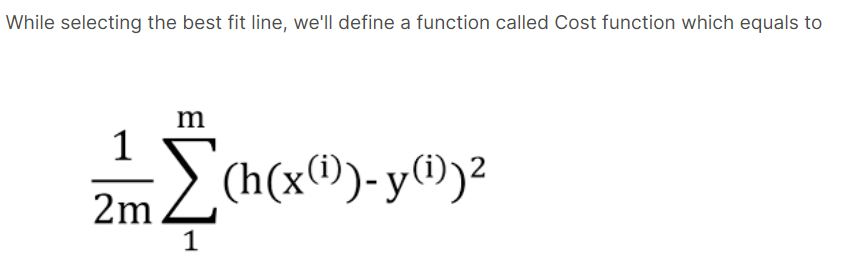

OR

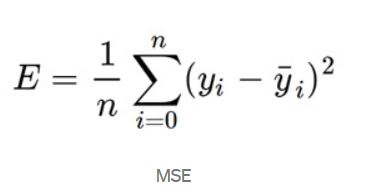

1. m is the number of samples — in our case, we have 10 samples (rows/data points) for X (data['experience']).
2. h(x) is the hypothesis value.
3. y is the actual value.

First, we divide by m, so that instead of being the total error (or cost) of the function, it is the average error instead. Then, we also divide by 2, because there is a square in the cost function. So, when we take the derivative (which we will, in order to optimize it using gradeint descent), the square will generate a 2 and cancel out. It's just aesthetics really.

In [100]:
def cost_fun(m, X, y):
    total = 0
    for i in range(m):
        sq_error = (y[i]-X[i])**2
        total+= sq_error
    return total*(1/(m))

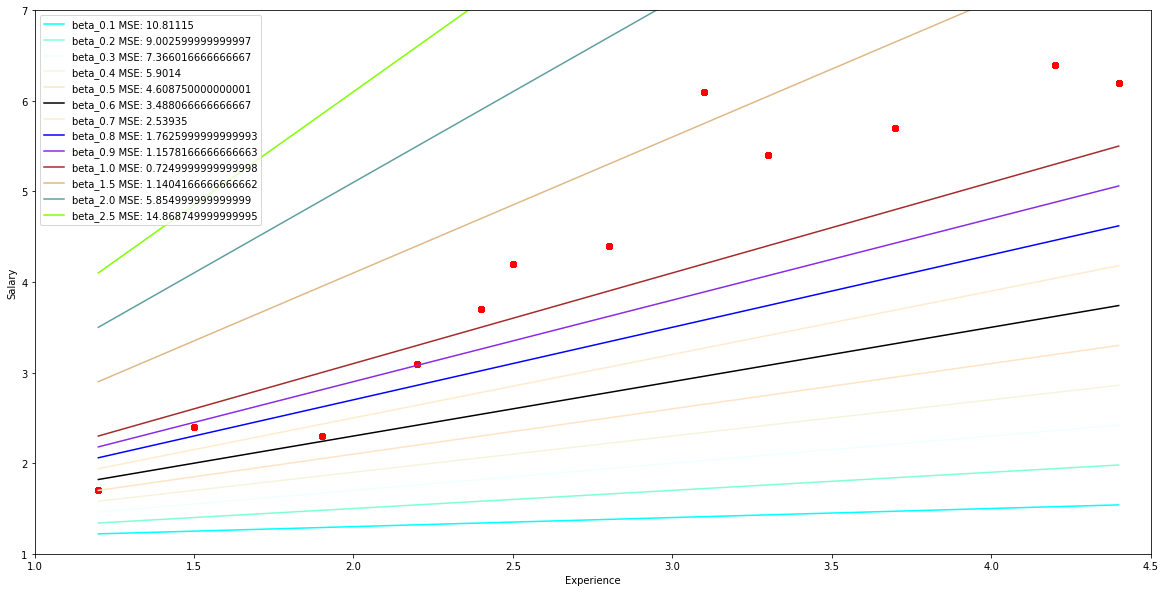

In [101]:
colors = ['#00FFFF',
'#7FFFD4',
'#F0FFFF',
'#F5F5DC',
'#FFE4C4',
'#000000',
'#FFEBCD',
'#0000FF',
'#8A2BE2',
'#A52A2A',
'#DEB887',
'#5F9EA0', '#7FFF00', '#D2691E']
beta = []
mse = []
for (col, clr) in zip(data.columns[2:], colors):
    y_axis = data[col]
    MSE = cost_fun(len(data), y_axis, data.salary)
    mse.append(MSE)
    beta.append(col)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.scatter(data.experience, data.salary, color = 'red')
    plt.plot(data.experience, y_axis, color = clr, label = col+" MSE: "+str(MSE))
    plt.xlim(1,4.5)
    plt.ylim(1,7)
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.legend()

The line with beta = 1.0 and y_intercept = 1.1 being the least MSE of 0.724

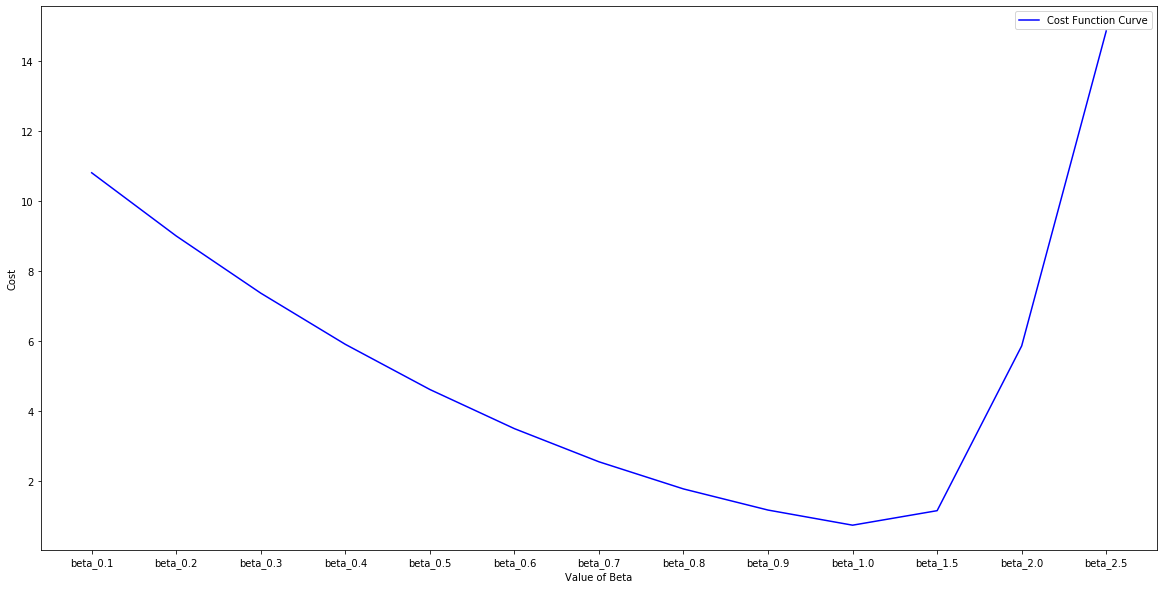

In [102]:
# plotting the cost values corresponding to every value of Beta
plt.plot(beta, mse, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

So as you can see the value of beta at 0.1 was around 5.4, so that is the starting value. After that the error goes down with the increasing value of Beta, reaches a minimum, and then it starts increasing.

##### Gradient Descent

Gradient Descent is an algorithm that finds the best-fit line for a given training dataset in a smaller number of iterations.

The algorithm starts with some value of m (beta) and c (y_intercept)(usually starts with m=0, c=0). We calculate MSE (cost) at point m=0, c=0. Lets say the MSE (cost) at m=0, c=0 is 100. Then we reduce the value of m and c by some amount (Learning Step). We will notice a decrease in MSE (cost). We will continue doing the same until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy).

Step 1: Let m = 0 and c = 0. Let L be our learning rate. It could be a small value like 0.01 for good accuracy.

##### When to use Derivative and Partial Derivate
A derivative is applied to functions that have only one independent variable.

A partial derivative is applied to functions that have more than one independent variable. The idea is that you find the derivative with respect to one of the variables and assume that all of the other variables are actually constants.

Ste 2: Calculate the partial derivative of the Cost function with respect to m. Let partial derivative of the Cost function with respect to m be Dm (With little change in m how much Cost function changes).

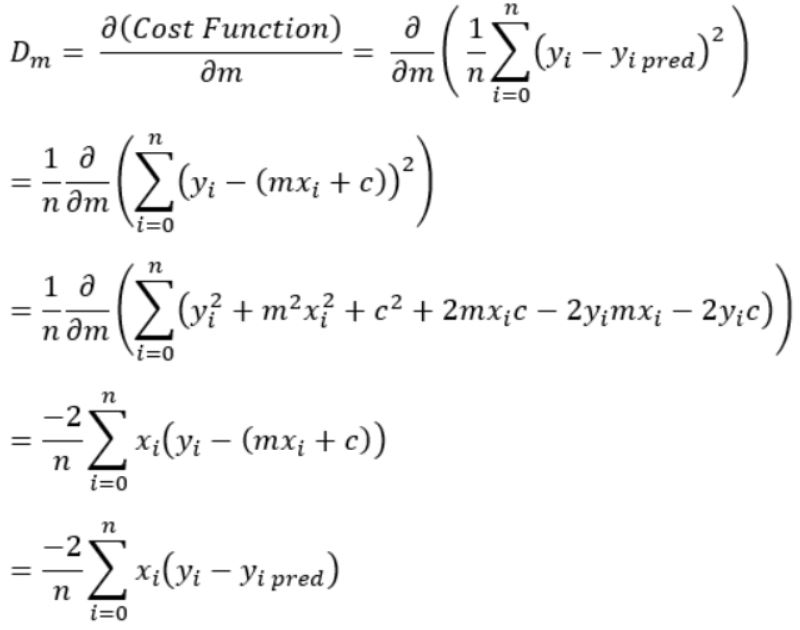

Similarly, let’s find the partial derivative with respect to c. Let partial derivative of the Cost function with respect to c be Dc (With little change in c how much Cost function changes).

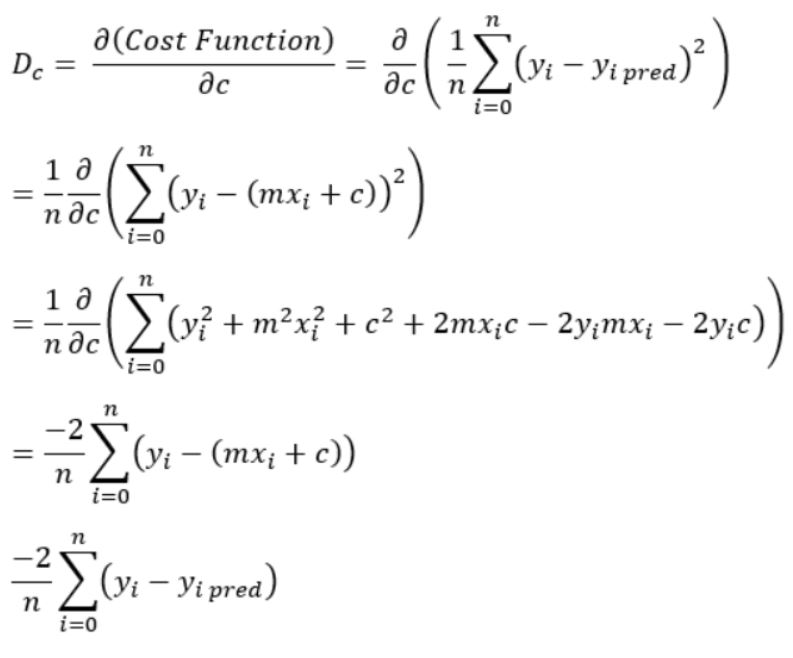

Step 3: Now update the current values of m and c using the following equation:

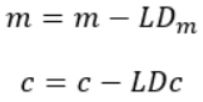

1. m can be considered the current position of the person. 
2. D is equivalent to the steepness of the slope and L can be the speed with which he moves. 
3. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. 
4. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. 
5. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
6. Now with the optimum value of m and c our model is ready to make predictions !

Step 4: We will repeat this process until our Cost function is very small (ideally 0).

###### Implementation

In [107]:
# Initialise m & c as 0
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

X = data['experience']
Y = data['salary']
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print ('Optimal Values of m & c:', m, c)

Optimal Values of m & c: 1.1995910871626052 0.3797631337543366


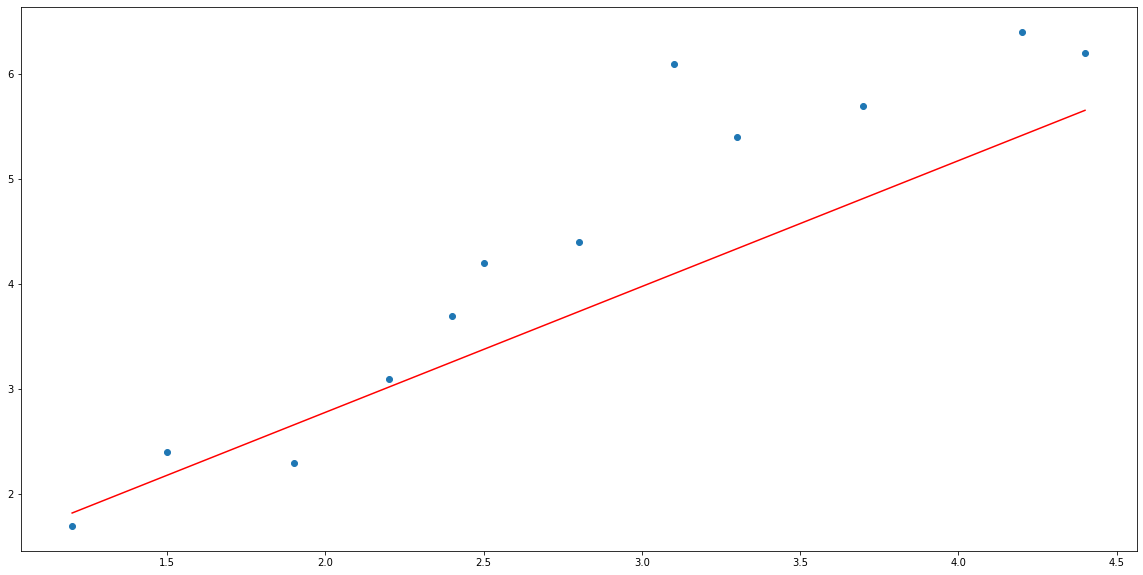

In [108]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()